<a href="https://cocl.us/DL0320EN_TOP_IMAGE">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0320EN/Assets/Images/Top.png" width="750" alt="IBM 10TB Storage">
</a>


<h1>Classifying European Money Denominations: Training a Pre-trained model  </h1>


<h2>Table of Contents</h2>


<p>In this lab, you will train the pre-trained model to classify the European currency. You will use the dataset object you created in the previous lab.</p>
<ul>
    <li><a href="#gen">Create Image Dataset Generator</a></li>
    <li><a href="#ques">Questions</a>
        <ol>
            <li><a href="q31">Question 3.1: Preparation</a></li>
            <li><a href="q32">Question 3.2: Train the model</a></li>
            <li><a href="q33">Question 3.3: Plot 5 Random Images with their predictions</a></li>
            <li><a href="q34">Question 3.4: Use the second model <code>Densenet121</code> to do the prediction</a></li>
        </ol>
    </li>
    <li><a href="#save">Save the trained model</a></li>
</ul>

<p>Estimated Time Needed: <b>60 mins</b></p>
<hr>


<h2>Preparation</h2>


<a href="https://cocl.us/DL0320EN_storage">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0320EN/Assets/Images/ObjectStorage.png" width="750" alt="cognitive class">
</a>


Download the datasets you needed for this lab.


In [385]:
# You can comment out this box when you already have the dataset
# Step 1: Ctrl + A : Select all
# Step 2: Ctrl + / : Comment out all; if everything selected has been comment out alreaday, then uncomment all

#Download Training Dataset
!wget --quiet -O /resources/data/training_data_pytorch.tar.gz https://cocl.us/DL0320EN_TRAIN_TAR_PYTORCH
!tar -xvzf  /resources/data/training_data_pytorch.tar.gz -C /resources/data --exclude '.*'

#Download Validation Dataset
!wget --quiet -O /resources/data/validation_data_pytorch.tar.gz https://cocl.us/DL0320EN_VALID_TAR_PYTORCH
!tar -xvzf  /resources/data/validation_data_pytorch.tar.gz -C /resources/data --exclude '.*'

tar: Error opening archive: Failed to open '/resources/data/training_data_pytorch.tar.gz'
tar: Error opening archive: Failed to open '/resources/data/validation_data_pytorch.tar.gz'


Import the PyTorch Modules needed in the lab.


In [386]:
# Import PyTorch Modules will be used in the lab

import torch 
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
import pandas
from torchvision import transforms
import torch.nn as nn
torch.manual_seed(0)
import os

Import Non-PyTorch Modules 


In [387]:
# Import Non-PyTorch Modules will be used in the lab

import time
from imageio import imread
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import random
import numpy as np

<hr>


<h2 id="gen">Create Dataset Class and Object</h2>


In this section, you use the dataset class from the last section.


The denomination, file name and the class variable for the training and validation data are stored in the following csv file.


In [388]:
# Url that contains CSV files

train_csv_file = 'data/training_labels.csv'
validation_csv_file = 'data/validation_labels.csv'

The training images and validation images  are stored in the following directories.


In [389]:
# Absolute path for finding the directory contains image datasets

train_data_dir = 'data/training_data_pytorch/'
validation_data_dir = 'data/validation_data_pytorch/'

Use  the dataset class you created in the last lab. You can cut and paste it to here:


In [390]:
# Create Dateaset Class

class Dataset(Dataset):
    
    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.data_name = pd.read_csv(csv_file)
        self.len = self.data_name.shape[0] 
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        img_name = self.data_dir + self.data_name.iloc[idx, 2]
        image = Image.open(img_name)
        y = self.data_name.iloc[idx, 3]
        if self.transform:
            image = self.transform(image)
        return image, y

Use the constructor <code>compose</code> to perform the following sequence of transformations in the order they are given, call the object <code>composed</code>


In [391]:
# Construct the composed object for transforming the image

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
composed = transforms.Compose([transforms.Resize((224, 224))
                               , transforms.ToTensor()
                               , transforms.Normalize(mean, std)])

Create a training dataset and validation dataset object using the csv file stored in the variables the <code>train_csv_file</code> and <code>validation_csv_file</code>. The directories are stored in the variable <code>train_data_dir</code> and <code>validation_data_dir</code>. Set the parameter <code>transform</code> to the object <code>composed</code>. 


In [392]:
# Create the train dataset and validation dataset

train_dataset = Dataset(transform=composed
                        ,csv_file=train_csv_file
                        ,data_dir=train_data_dir)

validation_dataset = Dataset(transform=composed
                          ,csv_file=validation_csv_file
                          ,data_dir=validation_data_dir)

<hr>


<h2 id="ques">Questions</h2>


<h3 id="q31">Question 3.1: Preparation</h3><b>5 points</b>


<b>Step 1</b>: Load the pre-trained model <code>resnet18</code> Set the parameter <code>pretrained</code> to true.


In [393]:
# Step 1: Load the pre-trained model resnet18

# Type your code here
model = models.resnet18(pretrained=True)

c:\Users\vinod\anaconda3\envs\myenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vinod\anaconda3\envs\myenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<b>Step 2</b>: The following lines of code will set the attribute <code>requires_grad</code> to <code>False</code>. As a result, the parameters will not be affected by training.


In [394]:
# Step 2: Set the parameter cannot be trained for the pre-trained model

# Type your code here
model.requires_grad_=False

<code>resnet18</code> is used to classify 1000 different objects; as a result, the last layer has 1000 outputs.  The 512 inputs come from the fact that the previously hidden layer has 512 outputs. 


<b>Step 3</b>: Replace the output layer <code>model.fc</code> of the neural network with a <code>nn.Linear</code> object, to classify 7 different bills. For the parameters <code>in_features </code> remember the last hidden layer has 512 neurons.


In [395]:
# Step 3: Re-defined the last layer

# Type your code here
model.fc = nn.Linear(in_features=512,out_features=7)

Print out the model in order to show whether you get the correct answer.<br> <b>(Your peer reviewer is going to mark based on what you print here.)</b>


In [396]:
# Print the model (PLEASE DO NOT MODIFY THIS BOX)

print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

<h3 id="q32">Question 3.2: Train the model</h3><b>5 points</b>


<b>Step 1</b>: Create a cross entropy criterion function 


In [397]:
# Step 1: Create the loss function

# Type your code here
loss = nn.CrossEntropyLoss()

<b>Step 2</b>: Create a training loader and validation loader object, the batch size is <i>15</i> and <i>10</i> respectively .


In [398]:
# Step 2: Create the data loader

# Type your code here
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=15)
validation_loader = torch.utils.data.DataLoader(validation_dataset,batch_size=10)

<b>Step 3</b>: Use the following optimizer to minimize the loss 


In [399]:
# Step 3: Use the pre-defined optimizer Adam with learning rate 0.003

# Type your code here
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

<b>Step 4</b>: Train the model for 20 epochs, save the loss in a list as will as the accuracy on the validation data for every epoch. The entire process may take 6.5 minutes. Print the validation accuracy for each epoch during the epoch loop. Then, plot the training loss for each epoch and validation error for each epoch.


In [400]:
# Step 4: Train the model

import matplotlib.pyplot as plt

N_EPOCHS = 20
loss_list = []
accuracy_list =[]
correct=0
n_test = len(validation_dataset)

for epoch in range(N_EPOCHS):
    running_loss = 0.0
    
    for i, (images, labels) in enumerate(validation_loader):
        outputs = model(images)
        losses = loss(outputs, labels)
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        
        running_loss += losses.item()
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
    
    mean_val_loss = running_loss / len(validation_loader)
    accuracy = 100. * correct / n_test
    
    loss_list.append(mean_val_loss)
    accuracy_list.append(accuracy)
    
    print(f'Epoch: {epoch+1} Validation Loss: {mean_val_loss:.4f} Accuracy: {accuracy:.4f}')




Epoch: 1 Validation Loss: 3.9007 Accuracy: 0.0000
Epoch: 2 Validation Loss: 2.1900 Accuracy: 2.8571
Epoch: 3 Validation Loss: 2.0741 Accuracy: 15.7143
Epoch: 4 Validation Loss: 2.1247 Accuracy: 28.5714
Epoch: 5 Validation Loss: 2.0794 Accuracy: 31.4286
Epoch: 6 Validation Loss: 2.0247 Accuracy: 32.8571
Epoch: 7 Validation Loss: 1.9640 Accuracy: 45.7143
Epoch: 8 Validation Loss: 2.0082 Accuracy: 55.7143
Epoch: 9 Validation Loss: 2.1622 Accuracy: 55.7143
Epoch: 10 Validation Loss: 1.9856 Accuracy: 57.1429
Epoch: 11 Validation Loss: 1.9619 Accuracy: 68.5714
Epoch: 12 Validation Loss: 1.9654 Accuracy: 72.8571
Epoch: 13 Validation Loss: 1.9460 Accuracy: 72.8571
Epoch: 14 Validation Loss: 1.9157 Accuracy: 85.7143
Epoch: 15 Validation Loss: 1.8870 Accuracy: 101.4286
Epoch: 16 Validation Loss: 1.8619 Accuracy: 117.1429
Epoch: 17 Validation Loss: 1.8073 Accuracy: 142.8571
Epoch: 18 Validation Loss: 1.8018 Accuracy: 168.5714
Epoch: 19 Validation Loss: 1.8303 Accuracy: 211.4286
Epoch: 20 Validati

<b>Step 5</b>: Plot the training loss for each iteration<br> <b>(Your peer reviewer is going to mark based on what you plot here.)</b> 


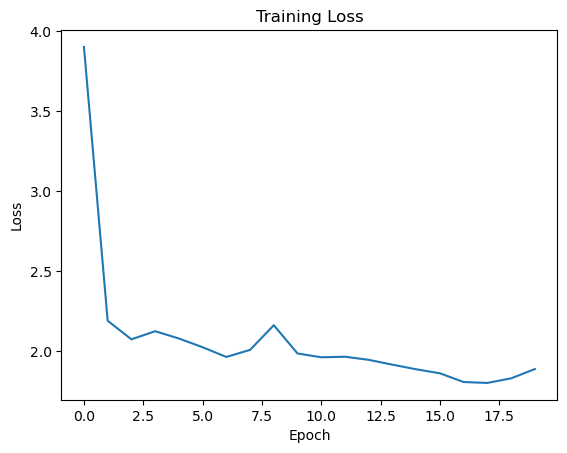

In [401]:
# Step 5: Plot the loss for training dataset

plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

<b>Step 6</b>: Plot the validation accuracy for each epoch<br> <b>(Your peer reviewer is going to mark based on what you plot here.)</b> 


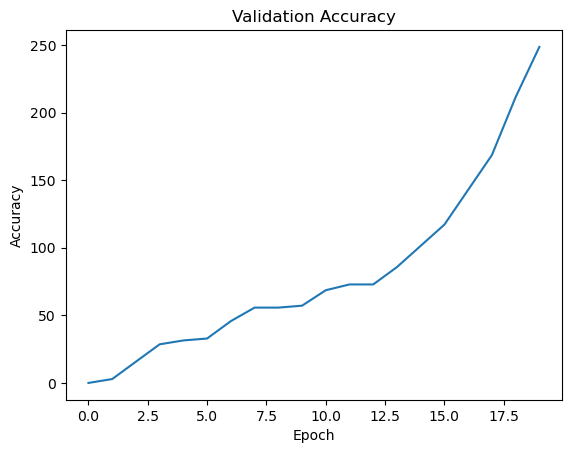

In [402]:
# Step 6: Plot the accuracy for valdiation dataset

plt.plot(accuracy_list)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.show()


Create a test dataset using validation data. And, create your own <code>plot_random_image()</code> function to plot 5 random images which index is in the <code>numbers</code> list. Run the function to plot image, print the predicted label and print a string indicate whether it has been correctly classified or mis-classified.<br> <b>(Your peer reviewer is going to mark based on what you plot here.)</b>


<h3 id="q33">Question 3.3: Plot 5 Random Images with their predictions</h3><b>5 points</b>


In [403]:
from pathlib import Path
data_path =  Path("data/")
image_path = Path('/Users/vinod/Desktop/resources/data/validation_data_pytorch')

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

\Users\vinod\Desktop\resources\data\validation_data_pytorch directory exists.


In [404]:
import os
def walk_through_dir(dir_path):
      for dirpath, dirnames, filenames in os.walk(dir_path):
       print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [405]:
test_dir = image_path 

In [406]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.ToTensor()  
])

In [407]:
from torchvision import datasets
test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform)

print(f"Test data:\n{test_data}")



Test data:
Dataset ImageFolder
    Number of datapoints: 70
    Root location: \Users\vinod\Desktop\resources\data\validation_data_pytorch
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [408]:
from torchvision import datasets
# from pathlib import Path

# Define the path to your image data directory
# image_path = Path("C:/Users/vinod/Desktop/resources/data/validation_data_pytorch")

# Load the image data using ImageFolder
test_data = datasets.ImageFolder(root=test_dir,transform=data_transform)
print(f"Test data:\n{test_data}")

Test data:
Dataset ImageFolder
    Number of datapoints: 70
    Root location: \Users\vinod\Desktop\resources\data\validation_data_pytorch
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [409]:
test_data.classes

['0', '1', '2', '3', '4', '5', '6']

In [410]:
class_names = test_data.classes
class_names

['0', '1', '2', '3', '4', '5', '6']

In [411]:
class_dict = test_data.class_to_idx
class_dict

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6}

In [412]:
len(test_data)

70

In [413]:
img, label = test_data[0][0], test_data[0][1]
print(f"Image tensor:\n{img}")
# print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")


print(f"Label datatype: {type(label)}")



Image tensor:
tensor([[[0.7176, 0.5059, 0.4824,  ..., 0.7451, 0.3686, 0.0039],
         [0.7255, 0.5176, 0.5490,  ..., 0.7451, 0.3804, 0.0039],
         [0.7216, 0.5216, 0.5176,  ..., 0.7451, 0.4471, 0.0118],
         ...,
         [0.0314, 0.5216, 0.7255,  ..., 0.0000, 0.0000, 0.0000],
         [0.0196, 0.4784, 0.7216,  ..., 0.0000, 0.0000, 0.0000],
         [0.0078, 0.3843, 0.5333,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.7490, 0.4667, 0.4078,  ..., 0.7765, 0.3882, 0.0000],
         [0.7569, 0.4902, 0.5294,  ..., 0.7765, 0.4000, 0.0000],
         [0.7529, 0.5020, 0.5843,  ..., 0.7765, 0.4667, 0.0078],
         ...,
         [0.0314, 0.5608, 0.7765,  ..., 0.0000, 0.0000, 0.0000],
         [0.0157, 0.5020, 0.7725,  ..., 0.0000, 0.0000, 0.0000],
         [0.0078, 0.3922, 0.5686,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.7294, 0.3961, 0.2980,  ..., 0.7843, 0.3961, 0.0039],
         [0.7412, 0.3961, 0.4157,  ..., 0.7843, 0.4078, 0.0039],
         [0.7373, 0.4000, 0.4549,  ..., 0.78

In [414]:
test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=1, 
                             num_workers=1,                             shuffle=False) 
test_dataloader

In [415]:
img, label = next(iter(test_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")


Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [416]:
test_data.classes, test_data.class_to_idx

(['0', '1', '2', '3', '4', '5', '6'],
 {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6})

In [417]:
target_directory = test_dir
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path))])
print(f"Class names found: {class_names_found}")

Target directory: \Users\vinod\Desktop\resources\data\validation_data_pytorch
Class names found: ['0', '0.jpeg', '1', '1.jpeg', '10.jpeg', '11.jpeg', '12.jpeg', '13.jpeg', '14.jpeg', '15.jpeg', '16.jpeg', '17.jpeg', '18.jpeg', '19.jpeg', '2', '2.jpeg', '20.jpeg', '21.jpeg', '22.jpeg', '23.jpeg', '24.jpeg', '25.jpeg', '26.jpeg', '27.jpeg', '28.jpeg', '29.jpeg', '3', '3.jpeg', '30.jpeg', '31.jpeg', '32.jpeg', '33.jpeg', '34.jpeg', '35.jpeg', '36.jpeg', '37.jpeg', '38.jpeg', '39.jpeg', '4', '4.jpeg', '40.jpeg', '41.jpeg', '42.jpeg', '43.jpeg', '44.jpeg', '45.jpeg', '46.jpeg', '47.jpeg', '48.jpeg', '49.jpeg', '5', '5.jpeg', '50.jpeg', '51.jpeg', '52.jpeg', '53.jpeg', '54.jpeg', '55.jpeg', '56.jpeg', '57.jpeg', '58.jpeg', '59.jpeg', '6', '6.jpeg', '60.jpeg', '61.jpeg', '62.jpeg', '63.jpeg', '64.jpeg', '65.jpeg', '66.jpeg', '67.jpeg', '68.jpeg', '69.jpeg', '7.jpeg', '8.jpeg', '9.jpeg', 'validation_labels.csv']


In [418]:
from typing import Tuple, Dict, List
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [419]:
find_classes(test_dir)

(['0', '1', '2', '3', '4', '5', '6'],
 {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6})

In [420]:
from torch.utils.data import Dataset
import pathlib

class ImageFolderCustom(Dataset):
    def __init__(self, targ_dir: str, transform=None) -> None:
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(targ_dir)
        def load_image(self, index: int) -> Image.Image:
            image_path = self.paths[index]
            return Image.open(image_path) 
        def __len__(self) -> int:
            "Returns the total number of samples."
            return len(self.paths)
        def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
            "Returns one sample of data, data and label (X, y)."
            img = self.load_image(index)
            class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
            class_idx = self.class_to_idx[class_name]
            if self.transform:
                return self.transform(img), class_idx # return data, label (X, y)
            else:
                return img, class_idx 


In [421]:
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [422]:

test_data_custom = ImageFolderCustom(targ_dir=test_dir)
test_data_custom

In [434]:
# Plot the images with labels

look_up = {0: 'predicted: €5'
           , 1: 'predicted: €10'
           , 2: 'predicted: €20'
           , 3: 'predicted: €50'
           , 4: 'predicted: €100'
           , 5: 'predicted: €200'
           , 6: 'predicted: €500'}
random.seed(0)
numbers = random.sample(range(70), 5)
# Type your code here
def plot_random_image(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          numbers: int = 5,
                          seed: int = None
                          ):
    
    # 2. Adjust display if n too high
    if numbers > 10:
        numbers = 10
            
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=numbers)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        
        #Plot adjusted samples
        plt.subplot(1, numbers, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        
        if classes:
            predicted_label = look_up[targ_label]
            plt.title(predicted_label, loc='left')
        if classes:
            look_up[targ_label] = classes[targ_label]
           
            plt.title('Classified', loc='right')
        else:
            plt.title('UnClassified', loc='right')



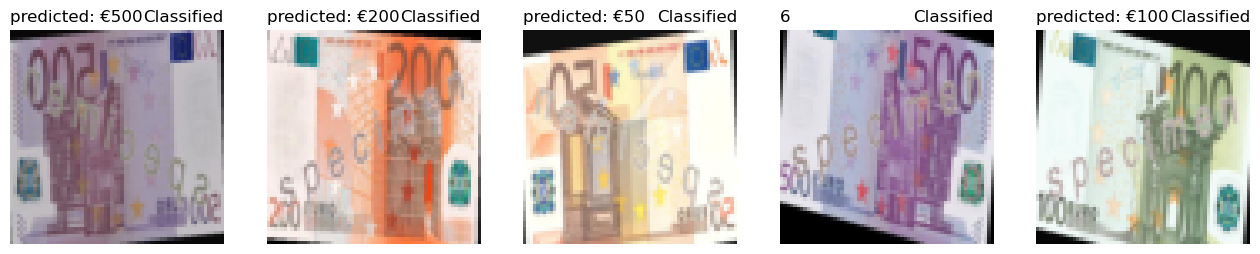

In [435]:


plot_random_image(test_data,
                  numbers=5,
                  classes=class_names,
                  seed=None
                  )

<h3>Question 3.4: Use the second model <code>Densenet121</code> to do the prediction</h3><b>3 points</b>


Repeat the steps in Question 3.1, 3.2 to predict the result using <code>models.densenet121</code> model. Then, print out the last validation accuracy.


<p>Steps:</p>
<ol>
    <li>Load the pre-trained model Densenet</li>
    <li>Replace the last classification layer with only 7 classes</li>
    <li>Set the configuration (parameters)</li>
    <li>Train the model</li>
    <li>Print the last validation accuracy</li>
</ol>


Hint:
<ul>
    <li>The second last layer for this model has 1024 outputs.</li>
    <li>The last layer for <code>Densenet121</code> can be accessed by <code>model.classifier</code></li>
    <li>Use the criterion function <code>nn.CrossEntropyLoss()</code></li>
    <li>Train Batch Size: 15; Validation Batch Size: 10</li>
    <li>Optimizer: Adam with learning rate 0.003</li>
    <li>10 Epoches. Otherwise, it will take too long.</li>
</ul>


You are welcome to try any pattern of setting and find out the best result. Please name the model variable as <code>model_des</code>.<br> <b>(Your peer reviewer is going to mark based on what you print here.)</b>


In [ ]:
model_des = models.densenet121(pretrained=True)

c:\Users\vinod\anaconda3\envs\myenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model_des.requires_grad_ = False

In [ ]:
model_des.fc = nn.Linear(in_features=1024,out_features=7)
print(model_des)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
loss = nn.CrossEntropyLoss()

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=15)
validation_loader = torch.utils.data.DataLoader(validation_dataset,batch_size=10)

In [ ]:
optimizer = torch.optim.Adam(model_des.parameters(),lr=0.003)

In [ ]:
# Use densenet121 to train the model and print out the last validation accuracy.

# Type your code here

N_EPOCHS = 10
loss_list = []  
accuracy_list = []  
n_test = len(validation_dataset)

for epoch in range(N_EPOCHS):
    running_loss = 0.0
    correct = 0

    for i, (image, labels) in enumerate(validation_loader):
        output = model_des(image)  
        losses = loss(output, labels)
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        running_loss += losses.item()
        _, predicted = output.max(1)
        correct += predicted.eq(labels).sum().item()

    mean_val_loss = running_loss / len(validation_loader)
    accuracy = 100 * correct / n_test  

    loss_list.append(mean_val_loss)
    accuracy_list.append(accuracy)

    print(f'Epoch: {epoch+1} Validation loss: {mean_val_loss} Accuracy: {accuracy}')


Epoch: 1 Validation loss: 8.002669947487968 Accuracy: 0.0
Epoch: 2 Validation loss: 3.0066695553915843 Accuracy: 7.142857142857143
Epoch: 3 Validation loss: 2.1658705132348195 Accuracy: 7.142857142857143
Epoch: 4 Validation loss: 2.310507433755057 Accuracy: 12.857142857142858
Epoch: 5 Validation loss: 2.2839674949645996 Accuracy: 1.4285714285714286
Epoch: 6 Validation loss: 2.0814376217978343 Accuracy: 12.857142857142858
Epoch: 7 Validation loss: 1.9240891592843192 Accuracy: 18.571428571428573
Epoch: 8 Validation loss: 1.9504141296659196 Accuracy: 18.571428571428573
Epoch: 9 Validation loss: 2.0248707703181674 Accuracy: 18.571428571428573
Epoch: 10 Validation loss: 1.9605884892599923 Accuracy: 11.428571428571429


<h2 id="#save">Save the trained model</h2>


Save the trained model for the following chapters


In [436]:
# Save the model

torch.save(model, "resnet18_pytorch.pt")
torch.save(model_des, "densenet121_pytorch.pt")

<a href="https://cocl.us/DLO0320EN_notebook_bott">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0320EN/Assets/Images/Bottom.png" width="750" alt="cognitive class">
</a>


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0320ENSkillsNetwork929-2023-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0320ENSkillsNetwork929-2023-01-01">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>, <a href="https://www.linkedin.com/in/yi-leng-yao-84451275/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0320ENSkillsNetwork929-2023-01-01">Yi Leng Yao</a>


<hr>


Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0320ENSkillsNetwork929-2023-01-01">MIT License</a>.
